In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/face emotion.zip'

# Directory where you want to extract the contents
extracted_dir_path = '/content/drive/MyDrive/face_emotion_data'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print("Extraction complete.")


Extraction complete.


In [ ]:
import os
import numpy as np
import cv2
# Define the paths to your train and validation directories
train_dir = '/content/drive/MyDrive/face_emotion_data/images/images/train'
validation_dir = '/content/drive/MyDrive/face_emotion_data/images/images/validation'

# Function to load images and labels from a directory
def load_images_and_labels(directory):
    images = []
    labels = []
    class_names = os.listdir(directory)
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        for filename in os.listdir(class_dir):
            image_path = os.path.join(class_dir, filename)
            # Load image
            image = cv2.imread(image_path)
            # Convert BGR to RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # Preprocess image (e.g., normalize pixel values to [0, 1])
            image = image / 255.0
            # Append the image and label
            images.append(image)
            labels.append(class_name)
    return np.array(images), np.array(labels)

# Load train and validation images and labels
train_images, train_labels = load_images_and_labels(train_dir)
validation_images, validation_labels = load_images_and_labels(validation_dir)


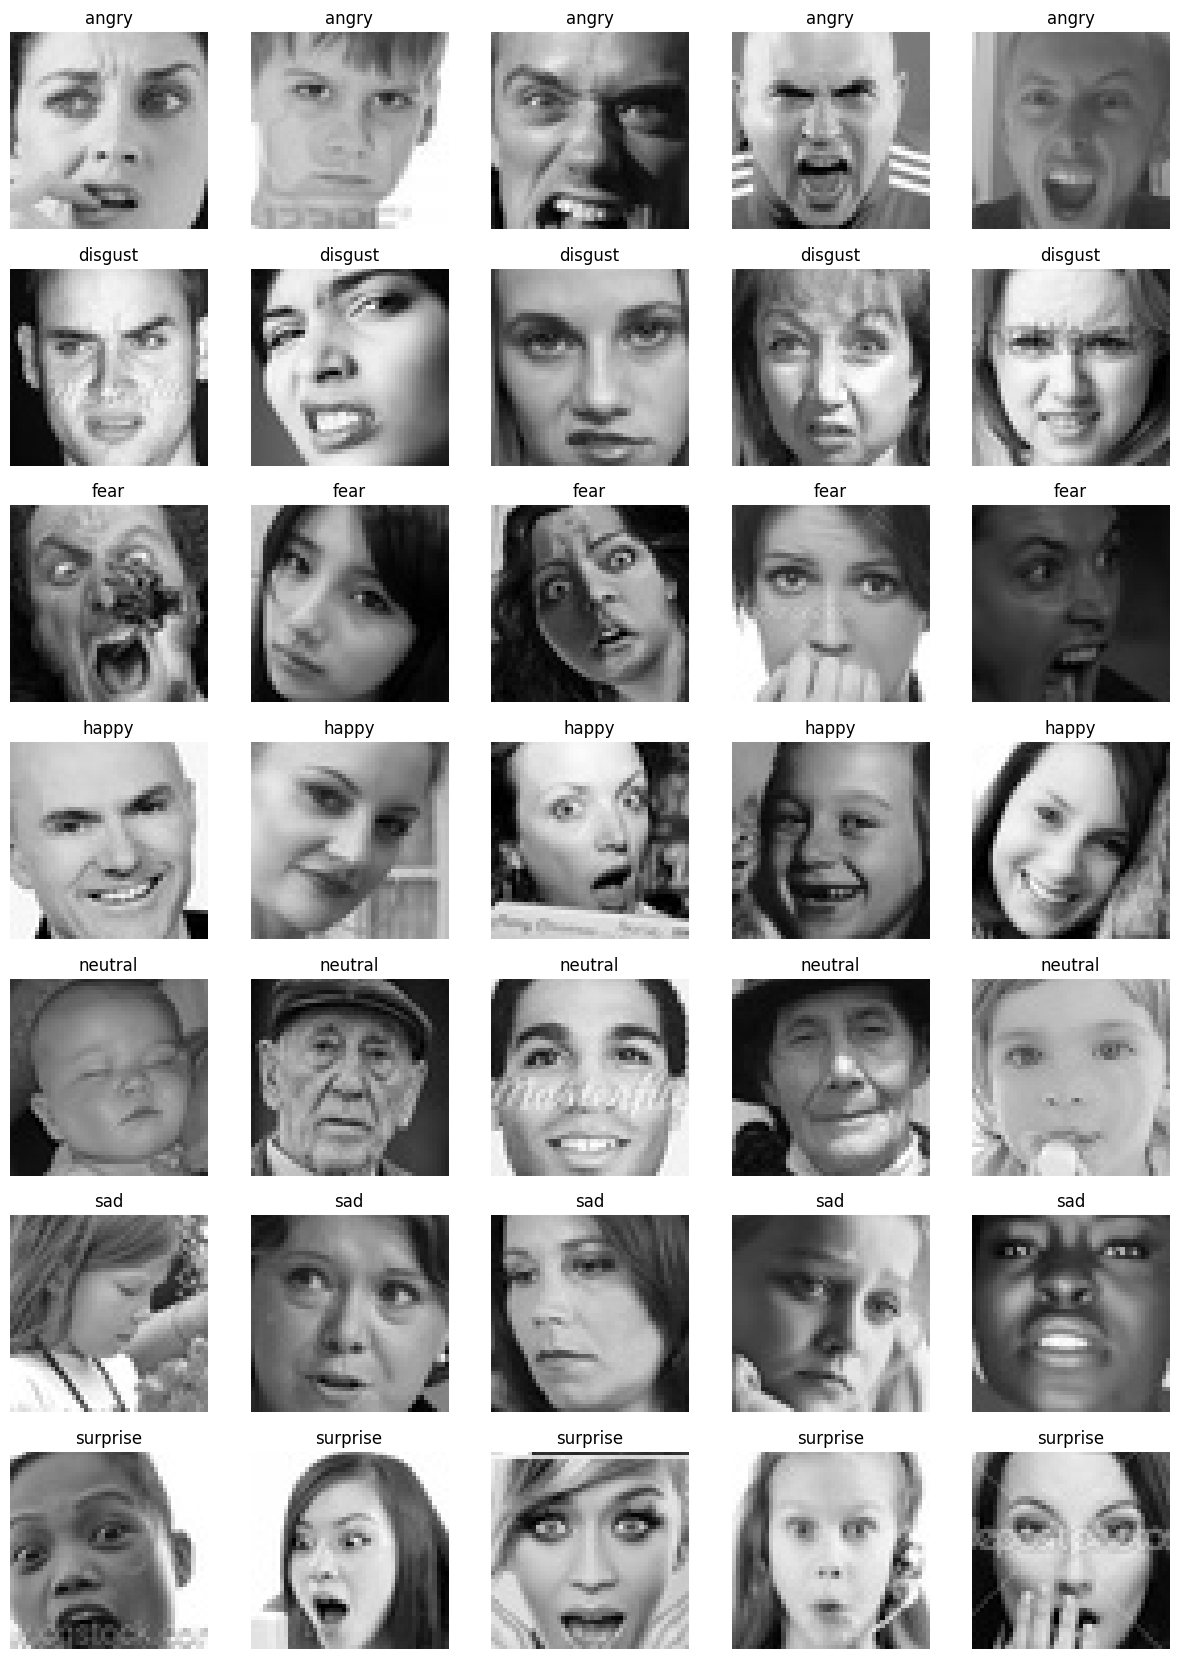

In [ ]:
import matplotlib.pyplot as plt

# Define a function to plot images with labels
def plot_images(images, labels, class_names, num_samples=5):
    num_classes = len(class_names)
    fig, axes = plt.subplots(num_classes, num_samples, figsize=(15, 3*num_classes))

    # Iterate over each class
    for i, class_name in enumerate(class_names):
        class_indices = [index for index, label in enumerate(labels) if label == class_name]
        sampled_indices = np.random.choice(class_indices, num_samples, replace=False)

        # Iterate over sampled images in the class
        for j, index in enumerate(sampled_indices):
            axes[i, j].imshow(images[index])
            axes[i, j].set_title(class_name)
            axes[i, j].axis('off')

    plt.show()

# Get unique class names
class_names = np.unique(train_labels)

# Plot sample images with labels
plot_images(train_images, train_labels, class_names)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Train set shape:", train_images.shape)
print("Test set shape:", test_images.shape)


Train set shape: (16139, 48, 48, 3)
Test set shape: (4035, 48, 48, 3)


In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow import keras
from keras import layers
from keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from skimage.transform import resize

import h5py

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Model parameters
num_classes = 7
input_shape = (48,48,3)

# Define the model architecture
input_layer = Input(shape=input_shape)

x = Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Flatten()(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

output_layer = Dense(num_classes, activation='softmax')(x)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
# Compile your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




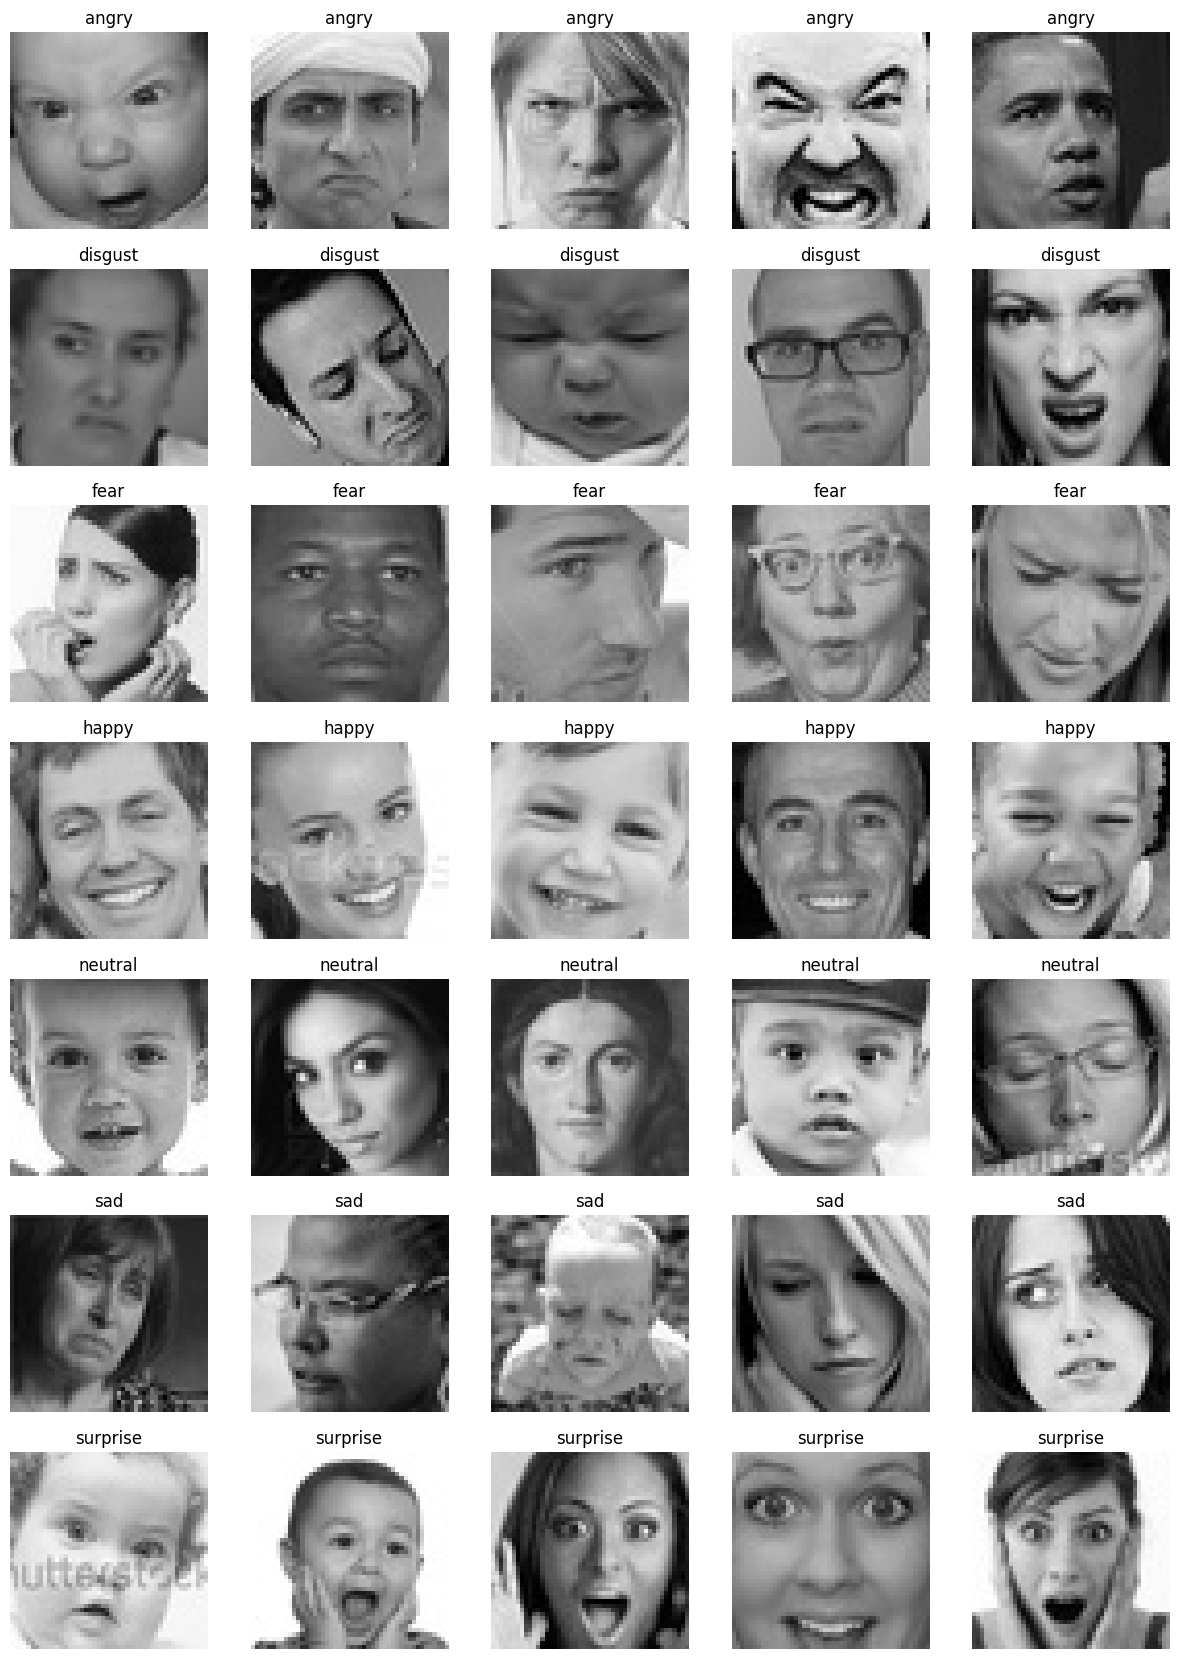

In [ ]:
# Print and plot samples
plot_images(train_images, train_labels, class_names, num_samples=5)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the training labels and transform both training and validation labels
train_labels_encoded = label_encoder.fit_transform(train_labels)
validation_labels_encoded = label_encoder.transform(validation_labels)

# Convert encoded labels to one-hot encoding
num_classes = len(label_encoder.classes_)
train_labels_encoded = to_categorical(train_labels_encoded, num_classes=num_classes)
validation_labels_encoded = to_categorical(validation_labels_encoded, num_classes=num_classes)

# Define validation data
x_val = validation_images
y_val = validation_labels_encoded


In [ ]:
# Confirm the shape and format of the encoded labels
print("Shape of train_labels_encoded:", train_labels_encoded.shape)
print("Shape of validation_labels_encoded:", validation_labels_encoded.shape)

print("Example of train_labels_encoded:", train_labels_encoded[:10])
print("Example of validation_labels_encoded:", validation_labels_encoded[:10])


Shape of train_labels_encoded: (20174, 7)
Shape of validation_labels_encoded: (7066, 7)
Example of train_labels_encoded: [[0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
Example of validation_labels_encoded: [[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',            # Monitor validation accuracy
    mode='max',                        # Maximize the monitored quantity
    patience=3,                       # Number of epochs with no improvement after which training will be stopped
    verbose=1,                         # Verbosity mode
    restore_best_weights=True,         # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model
history = model.fit(
    train_images,                     # Training data
    train_labels_encoded,             # Encoded training labels
    epochs=50,                        # Number of epochs
    batch_size=64,                    # Batch size
    validation_data=(x_val, y_val),   # Validation data
    callbacks=[early_stopping]        # Early stopping callback
)





Epoch 1/50
316/316 [==============================] - 6s 12ms/step - loss: 1.7877 - accuracy: 0.2579 - val_loss: 1.6435 - val_accuracy: 0.3447
Epoch 2/50
316/316 [==============================] - 3s 10ms/step - loss: 1.5624 - accuracy: 0.3846 - val_loss: 1.4263 - val_accuracy: 0.4564
Epoch 3/50
316/316 [==============================] - 4s 11ms/step - loss: 1.3909 - accuracy: 0.4663 - val_loss: 1.3625 - val_accuracy: 0.4757
Epoch 4/50
316/316 [==============================] - 3s 11ms/step - loss: 1.2905 - accuracy: 0.5067 - val_loss: 1.2576 - val_accuracy: 0.5241
Epoch 5/50
316/316 [==============================] - 3s 9ms/step - loss: 1.2083 - accuracy: 0.5449 - val_loss: 1.2314 - val_accuracy: 0.5388
Epoch 6/50
316/316 [==============================] - 3s 10ms/step - loss: 1.1294 - accuracy: 0.5711 - val_loss: 1.2182 - val_accuracy: 0.5437
Epoch 7/50
316/316 [==============================] - 3s 10ms/step - loss: 1.0537 - accuracy: 0.6031 - val_loss: 1.1967 - val_accuracy: 0.5541


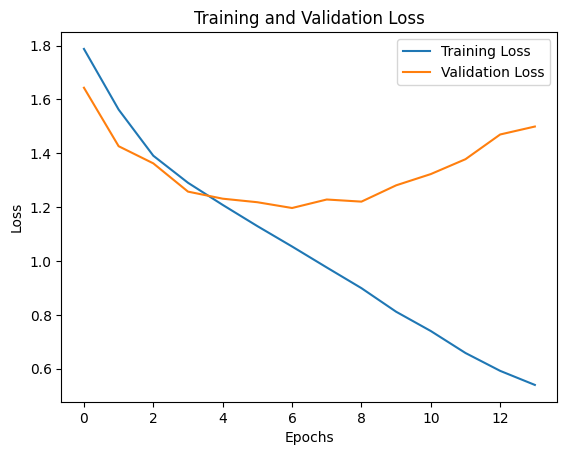

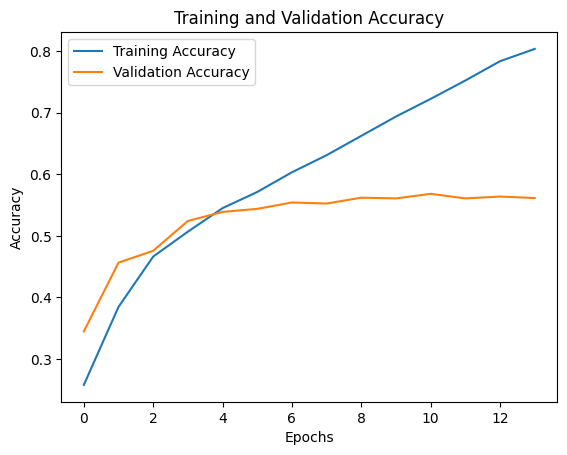

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
model.save("/content/drive/MyDrive/fer_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Transform test labels using the label encoder
test_labels_encoded = label_encoder.transform(test_labels)

# Convert encoded test labels to one-hot encoding
test_labels_encoded = to_categorical(test_labels_encoded, num_classes=num_classes)


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels_encoded)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


127/127 [==============================] - 1s 7ms/step - loss: 0.4989 - accuracy: 0.8342
Test Loss: 0.4988637864589691
Test Accuracy: 0.8342007398605347


Sample test labels:
['neutral' 'angry' 'sad' 'happy' 'happy' 'sad' 'angry' 'sad' 'fear'
 'surprise']


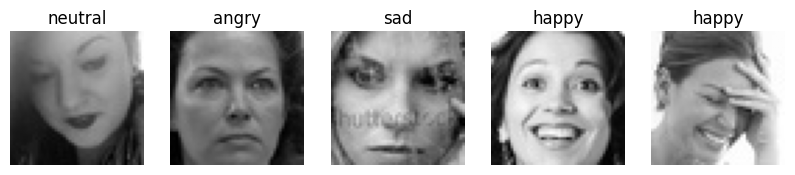

127/127 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Print some sample test labels
print("Sample test labels:")
print(test_labels[:10])  # Print the first 10 test labels

# Plot corresponding images
def plot_sample_images(images, labels, class_names, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])  # Convert one-hot encoding back to label
        plt.axis("off")
    plt.show()

# Plot some sample test images
plot_sample_images(test_images, test_labels_encoded, class_names, num_samples=5)

# Generate predictions using the trained model
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


### [0,1,2,3,4,5,6] Stand for [Angry,Sad,Fear,Happy,Neutral,Disgust,Surprise]

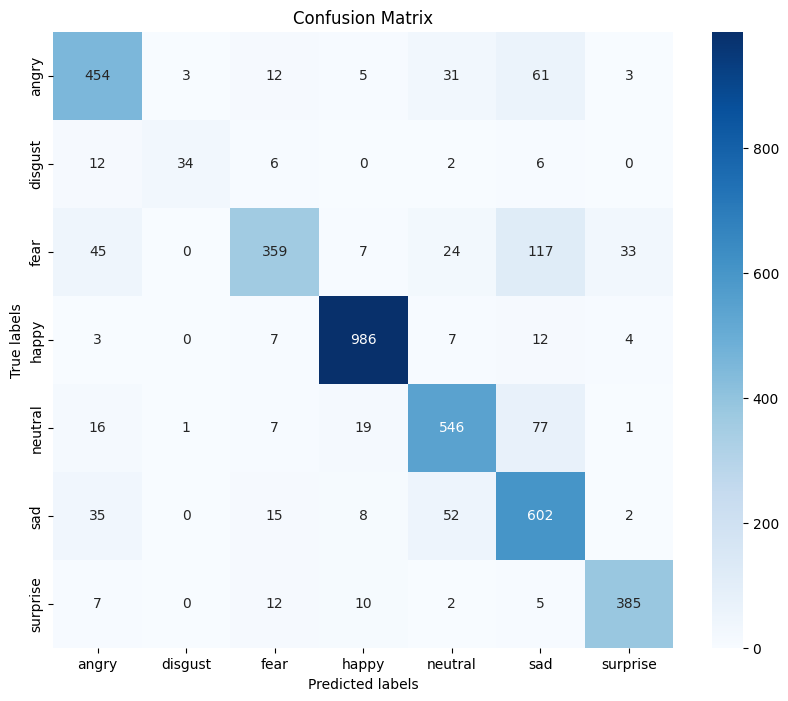

In [ ]:

# Create confusion matrix
conf_matrix = confusion_matrix(np.argmax(test_labels_encoded, axis=1), predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## **From Here You Can Run the live Camera**

In [ ]:

new_model=load_model('MyModelFaceRecogD6.h5')
test_img=cv2.imread('happy-boy.jpg')
test_img.shape
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

gray=cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

faces=faceCascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in faces:
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=test_img[y:y+h, x:x+w]
    cv2.rectangle(test_img, (x,y), (x+w,y+h), (255,0,0),2)
    facess=faceCascade.detectMultiScale(roi_gray)

    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi=roi_color[ey: ey+eh, ex: ex+ew]

face_roi=cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)

plt.imshow(face_roi)
finalimage=cv2.resize(face_roi , (48,48))
finalimage1=np.expand_dims(finalimage, axis=0)
finalimage=finalimage1/255.0


prediction=new_model.predict(finalimage)
prediction
path="haarcascade_frontalface_default.xml"
font_scale=1.6
font=cv2.FONT_ITALIC

rectangle_bgr=(255,255,255)
img=np.zeros((500,500))

text="some text in a boxl"

(text_width, text_height)=cv2.getTextSize(text,font, fontScale=font_scale, thickness=1)[0]
text_offset_x=10
text_offset_y=img.shape[0]-25

box_coords=((text_offset_x,text_offset_y),(text_offset_x+text_width+2,text_offset_y-text_height-2))

cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)

cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,115), thickness=1)

cap=cv2.VideoCapture(1)
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Camera")

while True:
    ret,test_img=cap.read()

    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray, 1.1, 4)


    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color=test_img[y:y+h, x:x+w]
        cv2.rectangle(test_img, (x,y), (x+w,y+h), (255,0,0),2)
        facess=faceCascade.detectMultiScale(roi_gray)

        if len(facess) == 0:
            print("Face not detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi=roi_color[ey: ey+eh, ex: ex+ew]


    face_roi=cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)
    finalimage=cv2.resize(face_roi, (48,48))
    finalimage=np.expand_dims(finalimage, axis=0)
    finalimage=finalimage/255.0

    finalimage=finalimage.reshape(1,48,48,3)

    font=cv2.FONT_HERSHEY_SIMPLEX

    prediction=new_model.predict(finalimage)

    font_scale=1.5
    font=cv2.FONT_HERSHEY_PLAIN

    if (np.argmax(prediction)==0):
        status= "Angry"

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(test_img, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
        cv2.putText(test_img, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.3, (0,0,255),2)
        cv2.putText(test_img, status,(100,150), font , 3, (0,0,255),2, cv2.LINE_4)
        cv2.rectangle(test_img, (x,y), (x+w, y+h), (112,0,25))


    elif (np.argmax(prediction)==1):
        status= "Disgust"

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(test_img, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
        cv2.putText(test_img, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.3, (0,0,255),2)
        cv2.putText(test_img, status,(100,150), font , 3, (0,0,255),2, cv2.LINE_4)
        cv2.rectangle(test_img, (x,y), (x+w, y+h), (112,0, 25))

    elif (np.argmax(prediction)==2):
        status= "Fear"

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(test_img, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
        cv2.putText(test_img, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.3, (0,0,255),2)
        cv2.putText(test_img, status,(100,150), font , 3, (0,0,255),2, cv2.LINE_4)
        cv2.rectangle(test_img, (x,y), (x+w, y+h), (112,0, 25))

    elif (np.argmax(prediction)==3):
        status= "Happy"

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(test_img, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
        cv2.putText(test_img, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.3, (0,0,255),2)
        cv2.putText(test_img, status,(100,150), font , 3, (0,0,255),2, cv2.LINE_4)
        cv2.rectangle(test_img, (x,y), (x+w, y+h), (112,0, 25))

    elif (np.argmax(prediction)==4):
        status= "Sad"

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(test_img, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
        cv2.putText(test_img, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.3, (0,0,255),2)
        cv2.putText(test_img, status,(100,150), font , 3, (0,0,255),2, cv2.LINE_4)
        cv2.rectangle(test_img, (x,y), (x+w, y+h), (112,0, 25))

    elif (np.argmax(prediction)==5):
        status= "Surprise"

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(test_img, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
        cv2.putText(test_img, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.3, (0,0,255),2)
        cv2.putText(test_img, status,(100,150), font , 3, (0,0,255),2, cv2.LINE_4)
        cv2.rectangle(test_img, (x,y), (x+w, y+h), (112,0, 25))

    else:
        status= "Neutral"

        x1,y1,w1,h1=0,0,175,75
        cv2.rectangle(test_img, (x1,x1),(x1+w1, y1+h1),(0,0,0), -1)
        cv2.putText(test_img, status, (x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_PLAIN, 0.3, (0,255,0),2)
        cv2.putText(test_img, status,(100,150), font , 3, (0,0,255),2, cv2.LINE_4)
        cv2.rectangle(test_img, (x,y), (x+w, y+h), (112,0,25))


    cv2.imshow('Face Emotion Recognition', test_img)

    if cv2.waitKey(2) & 0xFF==ord('q'):
        break

cap.release
cv2.destroyAllWindows()